# Import and set up environment

In [3]:
import openai
import os

In [7]:
# Set up variable
var_model = "gpt-3.5-turbo"
var_api_key = '<OPENAPI KEY>' # https://platform.openai.com/account/api-keys
var_temperature = 0 # this is the degree of randomness of the model's output

In [8]:
# Function to get prompt

def get_completion(prompt, model=var_model):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=var_temperature, 
    )
    return response.choices[0].message["content"]

# General guidance
Best practices in providing prompts include:
- Specify the task(s) to be performed clearly
- Use delimiters like ```, “““, < >, <tag> </tag>to clearly indicate distinct parts of the input.
- Ask for structured output, this is useful for using the model output for another machine processing.

# Zero-shot prompting
Prompt model to make predictions about previously unseen data without the need for any additional training. This works for common straightforward problem like classification (ie sentiment analysis, spam classification), text transformation (ie translation, summarizing, expanding), generation.

In [10]:
# Text quoted from Goodreads review by Zachariah Lewis on the book "The Almanack of Naval Ravikant"

text = f"""
I cannot believe how great this book is. I was familiar with Naval through Tools of Titans, but reading this showed that he is so much more than a few pages - no matter how well written - can capture.

This book is bound to be a classic, and the fact that Eric and Naval collaborated to release this for FREE, is amazing.

For more social proof, Tim Ferriss even broke his iron rule of No Forewords to write the foreword to this book.

There is no excuse for not picking this book up. There is something in it for everyone, and it's worth reflecting over.
"""
prompt = f"""
Determine the sentiment of the text delimited by triple backticks.
```{text}```
"""
response = get_completion(prompt)
print(response)

Positive


# Few-shot prompting
Provide demonstrations in the prompt to steer the model to better performance. In this technique, the model is given a small number of examples--typically between two and five--in order to quickly adapt to new examples of previously seen objects. 

In [17]:
prompt = f"""
Transform these emoji to Valentine related phrases

📅🌃: Date night
💋🙋🏼‍♂️: Kiss me
🥇💋: First kiss

🍯🌛:
"""

response = get_completion(prompt)
print(response)

Honey moon


In [16]:
# It is not always perfect..

prompt = f"""
Each emoji represents a number

🥹+🥹 = 10
😈+🥹 = 7
👽+😈 = 6

What number does this emoji represent 🥹 ? 
What number does this emoji represent 😈 ? 
What number does this emoji represent 👽 ? 
"""

response = get_completion(prompt)
print(response)

🥹 represents 3
😈 represents 4
👽 represents 2


# Chain-of-Thought (CoT) Prompting
Chain-of-thought (CoT) prompting enables complex reasoning capabilities through intermediate reasoning steps. You can combine it with few-shot prompting to get better results on more complex tasks that require reasoning before responding.

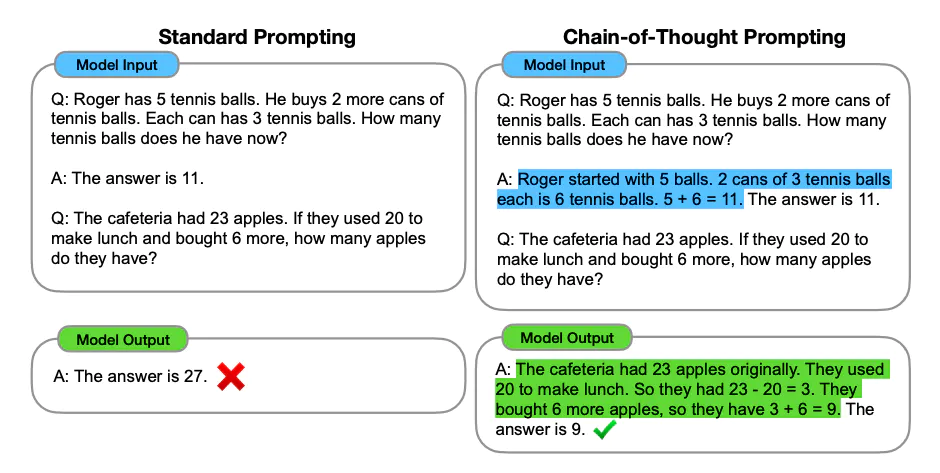

Image Source: Wei et al. (2022)

In [18]:
# Sample SAT Math questions from Khan Academy https://www.khanacademy.org/test-prep/v2-sat-math

prompt = f"""
Q: Maria is staying at a hotel that charges $99.95 per night plus tax for a room. \ 
A tax of 8% is applied to the room rate, and an additional onetime untaxed fee of $5.00 \
is charged by the hotel. Which of the following represents Maria’s total charge, \
in dollars, for staying 7 nights?

A: The base price is [$99.95 * 7 nights]. Additional charges is [0.08 * base price] for tax and $5.00 hotel fee. 
So the total cost is [1.08(99.95x) + 5] = $760.622

Q : A pair of jeans that regularly costs $40 is on sale for 30% off. As part of a promotion, \
each customer will also receive an additional discount on the marked sale price at the cash \
register. If the final price of the jeans was $22.40, what additional discount was applied \
to the marked sale price?

A :
"""
response = get_completion(prompt)
print(response)

First, we need to calculate the sale price of the jeans after the 30% discount: 
Sale price = $40 - (30% * $40) = $28 

Next, we need to find the additional discount applied to the sale price: 
Additional discount = $28 - $22.40 = $5.60 

Therefore, the additional discount applied to the marked sale price was $5.60.


## Least to Most Prompting
Least to Most prompting (LtM) takes CoT prompting a step further by first breaking a problem into sub problems then solving each one. It is a technique inspired by real-world educational strategies for children.

Submission by Zhou et al (2022) https://arxiv.org/abs/2205.10625

In [27]:
prompt = f"""
CUSTOMER INQUIRY:
We are a software company interested in upskilling our employees on communication, specifically \
for executive presentation. We'd like to engage with you for a communication training. As per our referral \
it seems we can do it with our $500 budget for a one hour session?

INSTRUCTIONS:
You are a personal assistant tasked with kindly responding to order inquiries \
of an independent consultant. The consultant offers in-person training on effective communication \
every first Monday of the month. Each training session is 3-6 hours and the price ranges from \
$500-$1000 per hour depending on the module and intended audience. There is a tailored module \
for executives for $5000 in which the consultant is focusing on. The consultant offers a 15% discount \
for returning customers, and offers up to 30% discount for customer purchasing more than 5 training sessions.

Today is Tuesday 9 May and the consultant will be out of office on 13-21 May. 

What subproblems must be solved before answering the inquiry?
"""
response = get_completion(prompt)
print(response)

1. Determine the specific communication training module that the software company is interested in.
2. Clarify the intended audience for the training.
3. Determine the duration of the training session that the software company is interested in.
4. Determine if the software company is a returning customer or if they are interested in purchasing multiple training sessions.
5. Determine if the consultant's schedule allows for a training session to be scheduled before or after their out of office period. 
6. Determine if the software company is willing to adjust their budget to fit the consultant's pricing for the specific training module they are interested in.


In [29]:
prompt = f"""
CUSTOMER INQUIRY:
We are a software company interested in upskilling our employees on communication, specifically \
for executive presentation. We'd like to engage with you for a communication training. As per our referral \
it seems we can do it with our $500 budget for a one hour session?

INSTRUCTIONS:
You are a personal assistant tasked with kindly responding to order inquiries \
of an independent consultant. The consultant offers in-person training on effective communication \
every first Monday of the month. Each training session is 3-6 hours and the price ranges from \
$500-$1000 per hour depending on the module and intended audience. There is a tailored module \
for executives for $5000 in which the consultant is focusing on. The consultant offers a 15% discount \
for returning customers, and offers up to 30% discount for customer purchasing more than 5 training sessions.

Today is Tuesday 9 May and the consultant will be out of office on 13-21 May. 

Let's go step by step. Determine the specific communication training module that the software company is interested in. 
"""
response = get_completion(prompt)
print(response)

The customer inquiry states that the software company is interested in upskilling their employees on communication, specifically for executive presentation. Therefore, the specific communication training module that the software company is interested in is the tailored module for executives.


# Generated Knowledge prompting
The idea behind the generated knowledge approach1 is to ask the LLM to generate potentially useful information about a given question/prompt before generating a final response.

For example, say you want to write an article about cybersecurity, particularly cookie theft. Before asking the LLM to write the article, you can ask it to generate some danger and protections against cookie theft. This will help the LLM write a more informative blog post. 

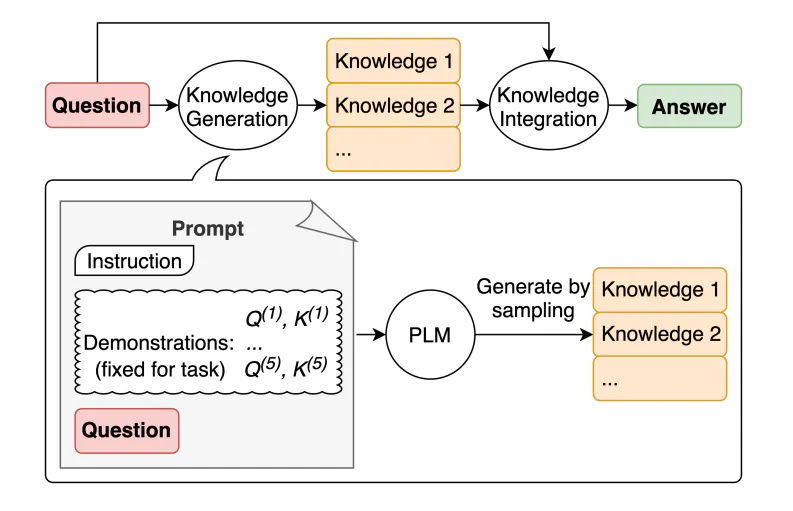

Image Source: Liu et al. 2022

In [36]:
# First ask the model to generate some content

prompt = f"""
Generate 2 points of the danger of cookie theft, \
explain how cookie theft works, and 5 things people \
can do to protect themselves against cookie theft.
"""
response = get_completion(prompt)
print(response)

Two points of the danger of cookie theft are:

1. Identity theft: Cookie theft can lead to identity theft, where the thief can gain access to sensitive information such as login credentials, credit card details, and personal information. This can result in financial loss and damage to one's reputation.

2. Unauthorized access: Cookie theft can also lead to unauthorized access to online accounts, which can be used to carry out malicious activities such as sending spam emails, posting inappropriate content, and stealing personal data.

Cookie theft works by stealing the cookies stored on a user's computer or device. Cookies are small text files that contain information about a user's online activity, such as login credentials, browsing history, and preferences. When a user visits a website, the website sends a cookie to the user's browser, which is then stored on the user's computer. If a hacker gains access to these cookies, they can use them to impersonate the user and gain access to t

In [37]:
# Then use the content generated for the main purpose/objective

prompt = f"""
Two points of the danger of cookie theft are:
1. Identity theft: Cookie theft can lead to identity theft, where the thief can gain access to sensitive information such as login credentials, credit card details, and personal information. This can result in financial loss and damage to one's reputation.
2. Unauthorized access: Cookie theft can also lead to unauthorized access to online accounts, which can be used to carry out malicious activities such as sending spam emails, posting inappropriate content, and stealing personal data.

Cookie theft works by stealing the cookies stored on a user's computer or device. Cookies are small text files that contain information about a user's online activity, such as login credentials, browsing history, and preferences. When a user visits a website, the website sends a cookie to the user's browser, which is then stored on the user's computer. If a hacker gains access to these cookies, they can use them to impersonate the user and gain access to their online accounts.

Here are five things people can do to protect themselves against cookie theft:
1. Use a secure browser: Use a browser that has built-in security features such as anti-phishing and anti-malware protection.
2. Use a VPN: Use a virtual private network (VPN) to encrypt your internet traffic and protect your online activity from prying eyes.
3. Clear cookies regularly: Clear your cookies regularly to remove any stored login credentials and other sensitive information.
4. Use two-factor authentication: Enable two-factor authentication on your online accounts to add an extra layer of security.
5. Use strong passwords: Use strong, unique passwords for each of your online accounts to prevent hackers from gaining access to multiple accounts if one password is compromised.

Use the knowledge above to create one article containing 3 short paragraphs on cookie theft. 
"""
response = get_completion(prompt)
print(response)

Paragraph 1: Cookie theft is a serious threat to online security. It can lead to identity theft, where the thief can gain access to sensitive information such as login credentials, credit card details, and personal information. This can result in financial loss and damage to one's reputation. Hackers can steal cookies stored on a user's computer or device, which contain information about a user's online activity, such as login credentials, browsing history, and preferences. If a hacker gains access to these cookies, they can use them to impersonate the user and gain access to their online accounts.

Paragraph 2: Another danger of cookie theft is unauthorized access to online accounts. Hackers can use stolen cookies to carry out malicious activities such as sending spam emails, posting inappropriate content, and stealing personal data. This can cause significant harm to the victim, as their online accounts may be used to spread malware or engage in illegal activities. It is important to